## Below are visualizing codes arranged as necessary

#### Installing necessary libraries

In [96]:
pip install matplotlib

In [97]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [98]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


#### Importing necessary libraries after installs

In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Recalling finalized for visualization purpose

In [100]:

df = pd.read_csv('Course Evaluation_Parami.csv')
df

,Timestamp,Age,Attendance %,Gender,Students Self Evaluation [I have been challenged to learn more than I expected.],Students Self Evaluation [I have put a great deal of effort in this course.],Students Self Evaluation [I consistently prepared for class.],Students Self Evaluation [I always perform well in the class. ],"Students Self Evaluation [Compared to my peers, I am above average student. ]",Skill and responsiveness of the instructor(s) [Teachings were clear and organized],...,Skill and responsiveness of the instructor(s) [Instructor(s) was available and helpful],"Skill and responsiveness of the instructor(s) [The instructor(s) cared about the students, their progress, and successful course completion.]",Course Structure [This class has increased my interest in data science field.],Course Structure [This course gave me confidence to do more advanced work in the subject.],Course Structure [I believe that what I am being asked to learn in this course is important.],Course Structure [This course was challenging.],Course Structure [This course helped me develop intellectual and critical thinking skills.],"On average, how many hours per week have you spent on this course, including attending classes, doing readings, reviewing notes, coding and any other course-related work?",Would you recommend this course to your friend.,Why did you choose this course?
0,2022/12/08 8:36:52 PM GMT+7,20,98,Female,Strongly Agree,Neutral,Neutral,Strongly disagree,Strongly disagree,Agree,...,Neutral,Neutral,Agree,Neutral,Agree,Strongly agree,Neutral,6,5,To take opportunity.
1,2022/12/08 8:37:19 PM GMT+7,19,100,Male,Strongly Agree,Agree,Agree,Neutral,Neutral,Agree,...,Agree,Agree,Agree,Strongly agree,Agree,Neutral,Agree,5,4,Interest
2,2022/12/08 8:37:42 PM GMT+7,20,100,Male,Strongly Agree,Agree,Agree,Strongly disagree,Strongly disagree,Agree,...,Agree,Agree,Strongly disagree,Strongly disagree,Neutral,Strongly agree,Disagree,3,4,To take opportunity.
3,2022/12/08 8:38:02 PM GMT+7,16,100,Male,Strongly disagree,Neutral,Strongly Agree,Strongly Agree,Strongly Agree,Strongly agree,...,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly disagree,Neutral,5,5,Interest
4,2022/12/08 8:38:18 PM GMT+7,20,90,Male,Agree,Neutral,Neutral,Strongly disagree,Strongly disagree,Strongly agree,...,Agree,Agree,Agree,Agree,Agree,Strongly agree,Agree,6,5,Degree requirement
5,2022/12/08 8:39:37 PM GMT+7,20,96,Male,Neutral,Agree,Agree,Neutral,Neutral,Strongly agree,...,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,Strongly agree,15,5,To take opportunity.
6,2022/12/08 8:39:37 PM GMT+7,20,100,Female,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly agree,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,12,5,Interest
7,2022/12/08 8:41:40 PM GMT+7,18,96,Female,Strongly Agree,Strongly Agree,Agree,Neutral,Disagree,Agree,...,Strongly agree,Strongly agree,Strongly agree,Neutral,Strongly agree,Agree,Agree,10,4,Interest
8,2022/12/08 8:43:27 PM GMT+7,36,99,Male,Strongly Agree,Agree,Strongly Agree,Agree,Agree,Strongly agree,...,Strongly agree,Agree,Strongly agree,Agree,Strongly agree,Neutral,Agree,300,5,Degree requirement
9,2022/12/08 9:11:01 PM GMT+7,18,100,Female,Strongly Agree,Agree,Neutral,Disagree,Disagree,Neutral,...,Agree,Agree,Neutral,Neutral,Neutral,Neutral,Neutral,12,3,Interest


In [101]:
# Renaming columns

df.rename(columns={"Timestamp":"time"}, inplace = True)

df.rename(columns={"Students Self Evaluation [I have been challenged to learn more than I expected.]": "Student_self_evaluation[challenges]"}, inplace=True)
df.rename(columns={"Students Self Evaluation [I have put a great deal of effort in this course.]":"Student_self_evaluation[putting_effort]"}, inplace=True)
df.rename(columns={"Students Self Evaluation [I consistently prepared for class.]":"Student_self_evaluation[prepared]"}, inplace=True)
df.rename(columns={"Students Self Evaluation [I always perform well in the class. ]":"Student_self_evaluation[performed_well]"}, inplace=True)
df.rename(columns={"Students Self Evaluation [Compared to my peers, I am above average student. ]":"Student_self_evaluation[above_avg]"}, inplace=True)

df.rename(columns={"Skill and responsiveness of the instructor(s) [Teachings were clear and organized]":"Skill_of_instructor[teaching_clear]"}, inplace=True)
df.rename(columns={"Skill and responsiveness of the instructor(s) [Instructor(s) stimulated student interest]":"Skill_of_instructor[stimu_student_interest]"}, inplace=True)
df.rename(columns={"Skill and responsiveness of the instructor(s) [Instructor(s) effectively used time during class periods]":"Skill_of_instructor[time_used_effectively]"}, inplace=True)
df.rename(columns={"Skill and responsiveness of the instructor(s) [Instructor(s) was available and helpful]":"Skill_of_instructor[available_helpful]"}, inplace=True)
df.rename(columns={"Skill and responsiveness of the instructor(s) [The instructor(s) cared about the students, their progress, and successful course completion.]":"Skill_of_instructor[instructor_cared_students]"}, inplace=True)

df.rename(columns={"Course Structure [This class has increased my interest in data science field.]":"Course_Structure[increased_my_ds]"}, inplace=True)
df.rename(columns={"Course Structure [This course gave me confidence to do more advanced work in the subject.]":"Course_Structure[gave_confidence]"}, inplace=True)
df.rename(columns={"Course Structure [I believe that what I am being asked to learn in this course is important.]":"Course_Structure[believed_learning_important]"}, inplace=True)
df.rename(columns={"Course Structure [This course was challenging.]":"Course_Structure[course_challenging]"}, inplace=True)
df.rename(columns={"Course Structure [This course helped me develop intellectual and critical thinking skills.]":"Course_Structure[course_developed_intell_critical]"}, inplace=True)

df.rename(columns={"On average, how many hours per week have you spent on this course, including attending classes, doing readings, reviewing notes, coding and any other course-related work?":"avg_hr_spent"}, inplace=True)
df.rename(columns={"Would you recommend this course to your friend. ":"recommend_fri"}, inplace=True)
df.rename(columns={"Why did you choose this course?":"why_chose_course"}, inplace=True)

# Replacing and Formatting objects into int

columns = [
    'Student_self_evaluation[challenges]',
    'Student_self_evaluation[putting_effort]',
    'Student_self_evaluation[prepared]',
    'Student_self_evaluation[performed_well]',
    'Student_self_evaluation[above_avg]',
    
    'Skill_of_instructor[teaching_clear]',
    'Skill_of_instructor[stimu_student_interest]',
    'Skill_of_instructor[time_used_effectively]',
    'Skill_of_instructor[available_helpful]',
    'Skill_of_instructor[instructor_cared_students]',
    
    'Course_Structure[increased_my_ds]',
    'Course_Structure[gave_confidence]',
    'Course_Structure[believed_learning_important]',
    'Course_Structure[course_challenging]',
    'Course_Structure[course_developed_intell_critical]'
]

mapping = {
    'strongly agree': 5,
    'agree': 4,
    'neutral': 3,
    'disagree': 2,
    'strongly disagree': 1
}

for column in columns:
    df[column] = df[column].str.lower().replace(mapping)
# replacing avg_hr_spent outlier with median (300 to 7)

# replacing Age outlier with median (36 to 20)

df['avg_hr_spent'] = df['avg_hr_spent'].replace(300, 7)

df['Age'] = df['Age'].replace(36, 20)

df

,time,Age,Attendance %,Gender,Student_self_evaluation[challenges],Student_self_evaluation[putting_effort],Student_self_evaluation[prepared],Student_self_evaluation[performed_well],Student_self_evaluation[above_avg],Skill_of_instructor[teaching_clear],...,Skill_of_instructor[available_helpful],Skill_of_instructor[instructor_cared_students],Course_Structure[increased_my_ds],Course_Structure[gave_confidence],Course_Structure[believed_learning_important],Course_Structure[course_challenging],Course_Structure[course_developed_intell_critical],avg_hr_spent,recommend_fri,why_chose_course
0,2022/12/08 8:36:52 PM GMT+7,20,98,Female,5,3,3,1,1,4,...,3,3,4,3,4,5,3,6,5,To take opportunity.
1,2022/12/08 8:37:19 PM GMT+7,19,100,Male,5,4,4,3,3,4,...,4,4,4,5,4,3,4,5,4,Interest
2,2022/12/08 8:37:42 PM GMT+7,20,100,Male,5,4,4,1,1,4,...,4,4,1,1,3,5,2,3,4,To take opportunity.
3,2022/12/08 8:38:02 PM GMT+7,16,100,Male,1,3,5,5,5,5,...,4,5,5,5,5,1,3,5,5,Interest
4,2022/12/08 8:38:18 PM GMT+7,20,90,Male,4,3,3,1,1,5,...,4,4,4,4,4,5,4,6,5,Degree requirement
5,2022/12/08 8:39:37 PM GMT+7,20,96,Male,3,4,4,3,3,5,...,5,5,5,4,4,5,5,15,5,To take opportunity.
6,2022/12/08 8:39:37 PM GMT+7,20,100,Female,5,5,5,5,4,5,...,5,5,5,5,5,5,5,12,5,Interest
7,2022/12/08 8:41:40 PM GMT+7,18,96,Female,5,5,4,3,2,4,...,5,5,5,3,5,4,4,10,4,Interest
8,2022/12/08 8:43:27 PM GMT+7,20,99,Male,5,4,5,4,4,5,...,5,4,5,4,5,3,4,7,5,Degree requirement
9,2022/12/08 9:11:01 PM GMT+7,18,100,Female,5,4,3,2,2,3,...,4,4,3,3,3,3,3,12,3,Interest


In [102]:
vis = df.groupby('Age') [[ 'Student_self_evaluation[prepared]', 'Student_self_evaluation[performed_well]',
    'avg_hr_spent', 'Student_self_evaluation[putting_effort]'
    ]].mean()
vis

,Student_self_evaluation[prepared],Student_self_evaluation[performed_well],avg_hr_spent,Student_self_evaluation[putting_effort]
Age,,,,
16,5.000000,5.000000,5.0,3.0
18,3.500000,2.500000,11.0,4.5
19,4.000000,3.000000,5.0,4.0
20,4.142857,2.571429,8.0,4.0


Text(0.5, 1.0, 'Stacked Bar Chart Analysis for Ages')

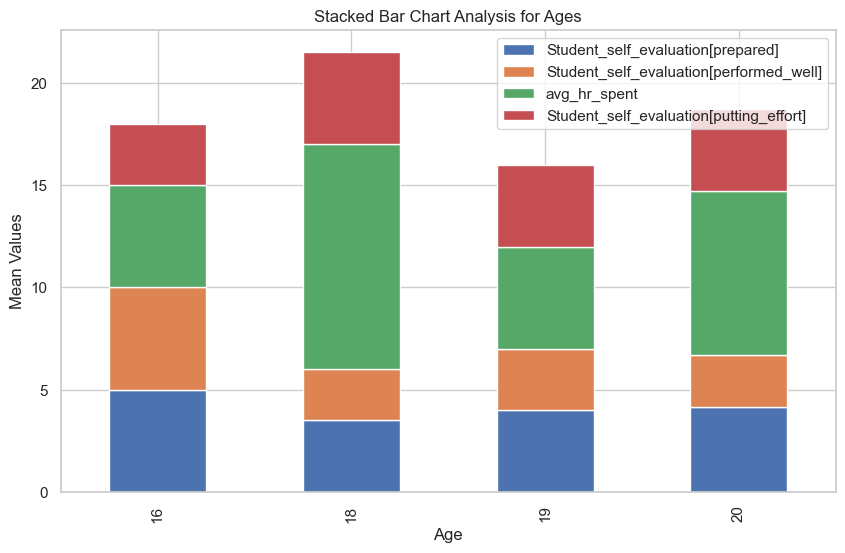

In [126]:
vis.plot.bar(stacked=True, figsize=(10, 6))

plt.xlabel('Age Group')
plt.ylabel('Respective Mean Values')
plt.title('Stack Bar Chart for ')

plt.xlabel('Age')
plt.ylabel('Mean Values')
plt.title('Stacked Bar Chart Analysis for Ages')



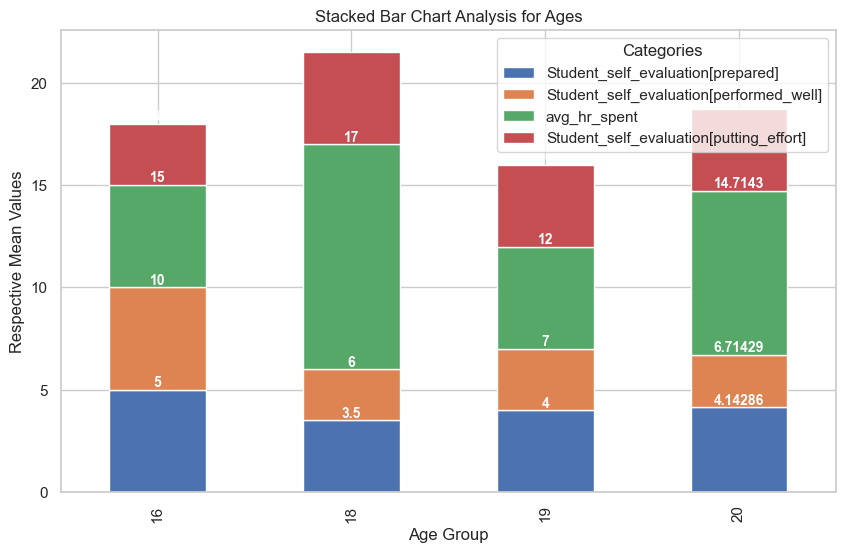

In [127]:
ax = vis.plot.bar(stacked=True, figsize=(10, 6))


for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='white', weight='bold')


ax.set_xlabel('Age Group')
ax.set_ylabel('Respective Mean Values')
ax.set_title('Stacked Bar Chart Analysis for Ages')

# Display the legend
ax.legend(title='Categories')


<Axes: ylabel='count'>

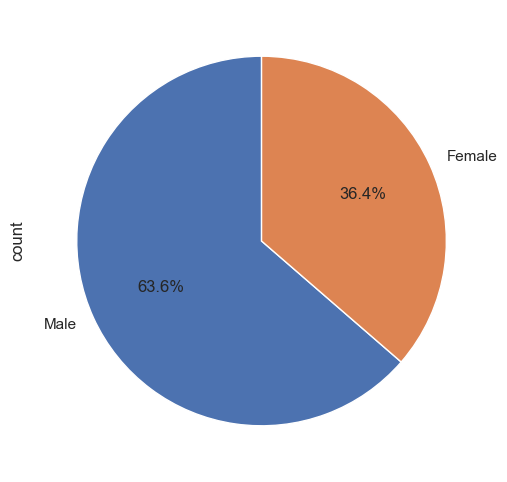

In [128]:
gender = df['Gender'].value_counts()

gender.plot.pie(autopct = '%1.1f%%', startangle = 90, figsize = (6,6))


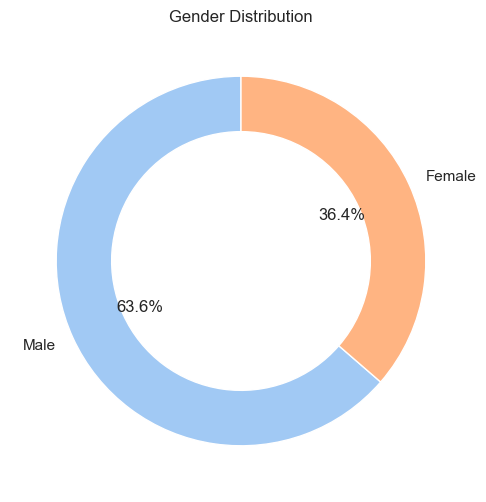

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the values for the 'Gender' column
gender_counts = df['Gender'].value_counts()

# Set Seaborn style for improved aesthetics
sns.set(style="whitegrid", palette="pastel")

# Plotting pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.3))

# Adding a title
plt.title('Gender Distribution')

# Show the plot
plt.show()


Text(0.5, 1.0, 'Performance Analysis')

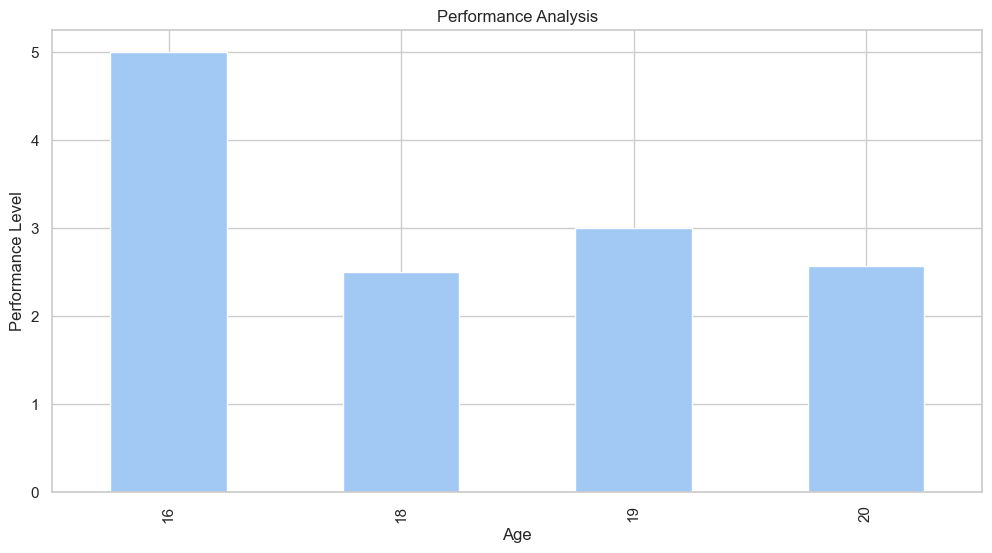

In [130]:
perform = df.groupby('Age')['Student_self_evaluation[performed_well]'].mean()
perform

perform.plot.bar(figsize=(12, 6))


plt.xlabel('Age')
plt.ylabel('Performance Level')
plt.title('Performance Analysis')

In [108]:
df.groupby('Age')['Student_self_evaluation[performed_well]'].mean()

Age
16    5.000000
18    2.500000
19    3.000000
20    2.571429
Name: Student_self_evaluation[performed_well], dtype: float64

In [109]:
df.groupby(['Age', 'Gender'])['Student_self_evaluation[performed_well]'].mean().unstack()

Gender,Female,Male
Age,,
16,NaN,5.0
18,2.5,NaN
19,NaN,3.0
20,3.0,2.4


In [110]:
df[['Age','Gender']]

,Age,Gender
0,20,Female
1,19,Male
2,20,Male
3,16,Male
4,20,Male
5,20,Male
6,20,Female
7,18,Female
8,20,Male
9,18,Female


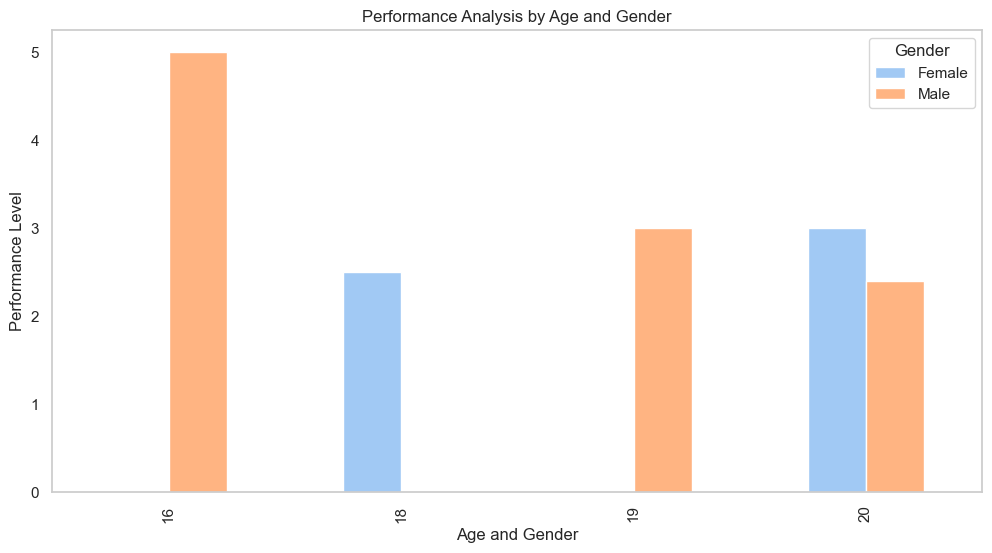

In [132]:
perform = df.groupby(['Age', 'Gender'])['Student_self_evaluation[performed_well]'].mean()

# Unstack to pivot the Gender index into columns
perform = perform.unstack()

# Plotting the bar chart
perform.plot.bar(figsize=(12, 6))

# Adding labels and a title
plt.xlabel('Age and Gender')
plt.ylabel('Performance Level')
plt.title('Performance Analysis by Age and Gender')
plt.grid(False)

# Show the plot
plt.show()


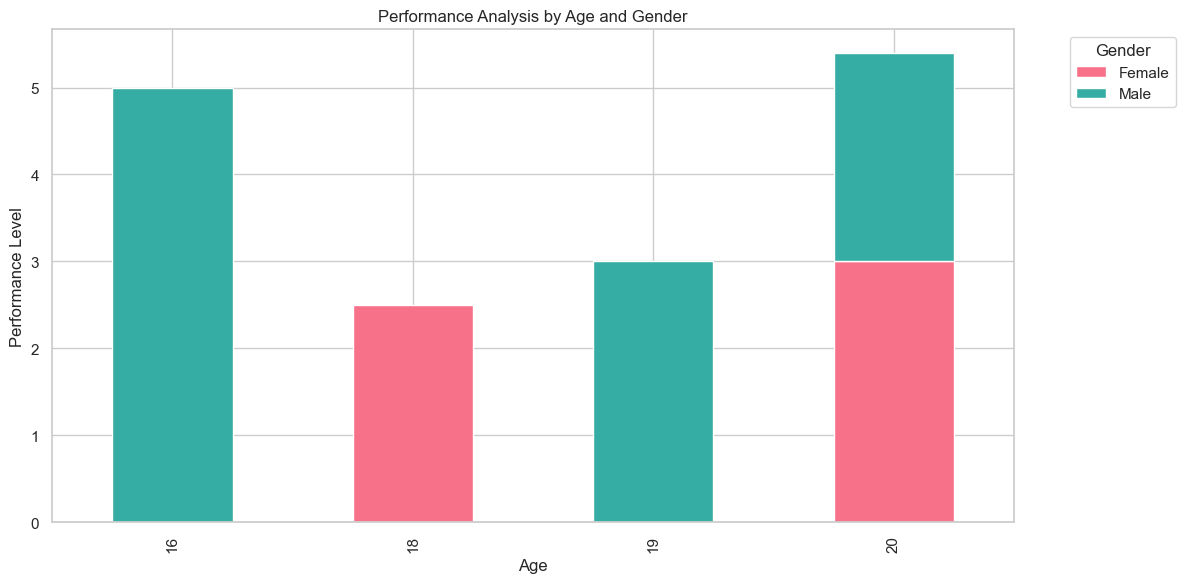

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns  


perform = df.groupby(['Age', 'Gender'])['Student_self_evaluation[performed_well]'].mean().unstack()


colors = sns.color_palette('husl', n_colors=len(perform.columns))

ax = perform.plot.bar(stacked=True, figsize=(12, 6), color=colors)

# Adding labels and a title
ax.set_xlabel('Age')
ax.set_ylabel('Performance Level')
ax.set_title('Performance Analysis by Age and Gender')

# Customizing the legend
ax.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout() 
plt.show()


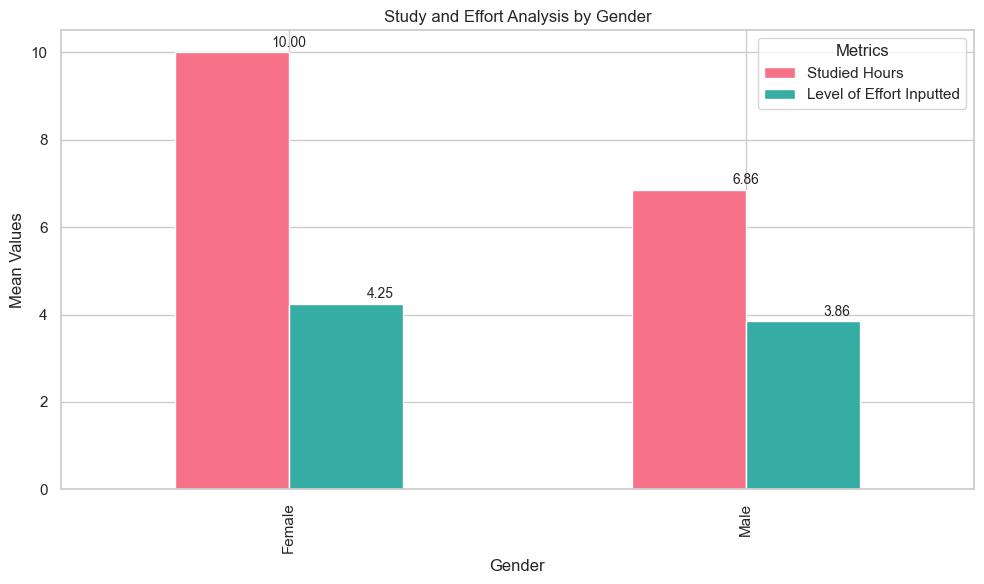

In [113]:
# USE

import matplotlib.pyplot as plt
import seaborn as sns  

# Group by Gender and calculate the mean
study_more = df.groupby('Gender')[['avg_hr_spent', 'Student_self_evaluation[putting_effort]']].mean()

# Set a color palette for better distinction
colors = sns.color_palette('husl', n_colors=len(study_more.columns))

# Plotting the grouped bar chart
ax = study_more.plot(kind='bar', figsize=(10, 6), color=colors)

# Adding labels and a title
ax.set_xlabel('Gender')
ax.set_ylabel('Mean Values')
ax.set_title('Study and Effort Analysis by Gender')

# Customizing the legend

ax.legend(title='Metrics', labels=['Studied Hours', 'Level of Effort Inputted'])

# Adding annotations
for i, (col, values) in enumerate(study_more.iterrows()):
    for j, v in enumerate(values):
        ax.text(i + j * 0.2, v + 0.05, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout() 
plt.show()

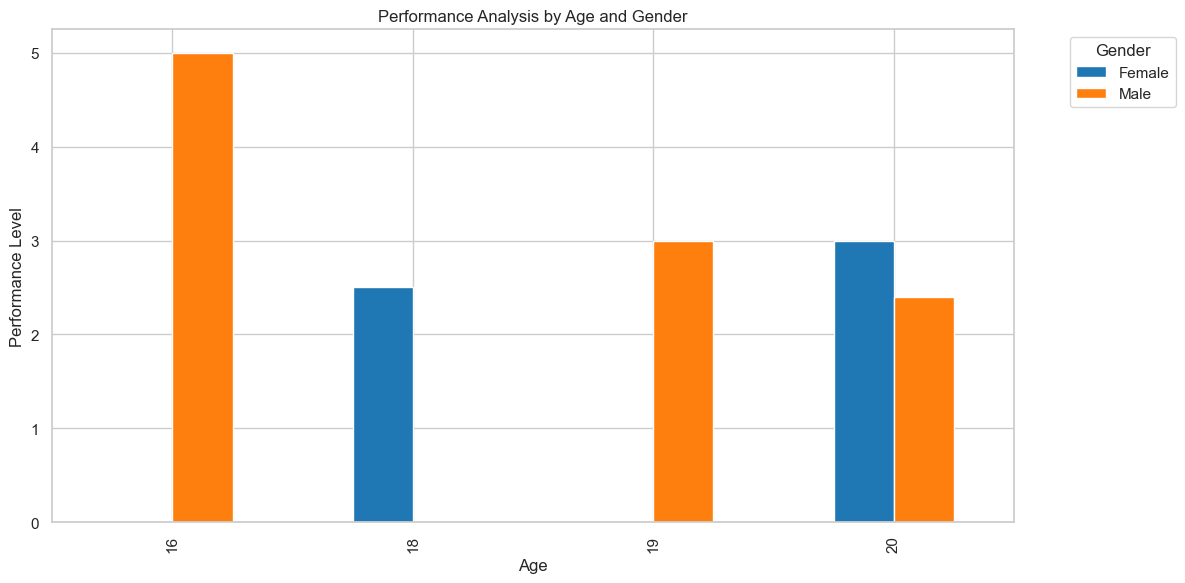

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns  

perform = df.groupby(['Age', 'Gender'])['Student_self_evaluation[performed_well]'].mean().unstack()

# Set a color palette for better distinction
colors = sns.color_palette('husl', n_colors=len(perform.columns))

# Plotting the grouped bar chart
ax = perform.plot(kind='bar', figsize=(12, 6), color=(['#1f77b4', '#ff7f0e']))

# Adding labels and a title
ax.set_xlabel('Age')
ax.set_ylabel('Performance Level')
ax.set_title('Performance Analysis by Age and Gender')

# Customizing the legend
ax.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout() 
plt.show()


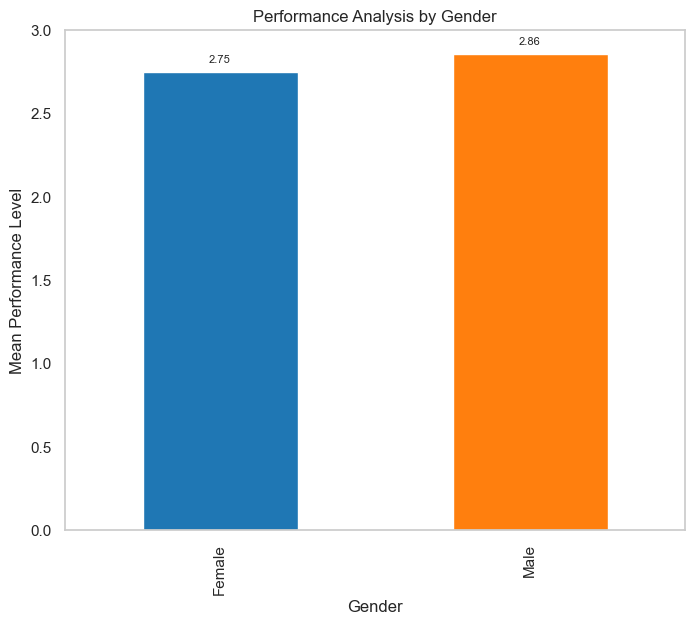

In [115]:
import matplotlib.pyplot as plt

# Group by Gender and calculate the mean
performance_by_gender = df.groupby('Gender')['Student_self_evaluation[performed_well]'].mean()

# Plotting the bar chart
plt.figure(figsize=(8, 6.5))
ax = performance_by_gender.plot(kind='bar', color=(['#1f77b4', '#ff7f0e']))

# Adding labels and a title
plt.xlabel('Gender')
plt.ylabel('Mean Performance Level')
plt.title('Performance Analysis by Gender')

plt.grid(False)

# Adding values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=8)

# Show the plot
plt.show()


<Figure size 3000x1000 with 0 Axes>

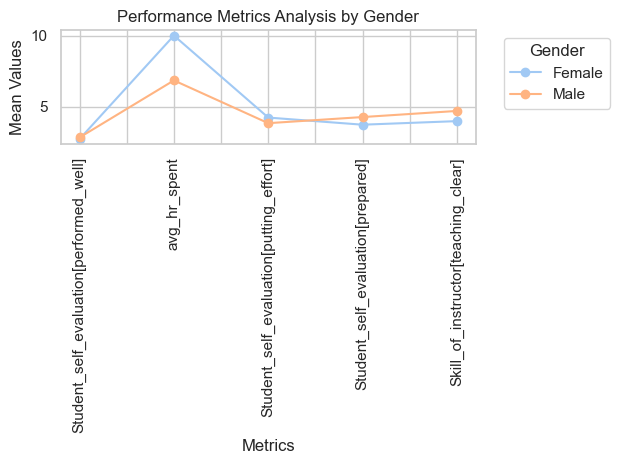

In [116]:
import matplotlib.pyplot as plt

# Group by Gender and calculate the mean for multiple metrics
metrics_by_gender = df.groupby('Gender')[['Student_self_evaluation[performed_well]', 'avg_hr_spent', 'Student_self_evaluation[putting_effort]',
                      'Student_self_evaluation[prepared]', 'Skill_of_instructor[teaching_clear]'
                     ]].mean()

# Plotting the line chart
plt.figure(figsize=(30, 10))
metrics_by_gender.T.plot(kind='line', marker='o')

# Adding labels and a title
plt.xlabel('Metrics')
plt.ylabel('Mean Values')
plt.title('Performance Metrics Analysis by Gender')

plt.xticks(rotation='vertical')

# Show the plot
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



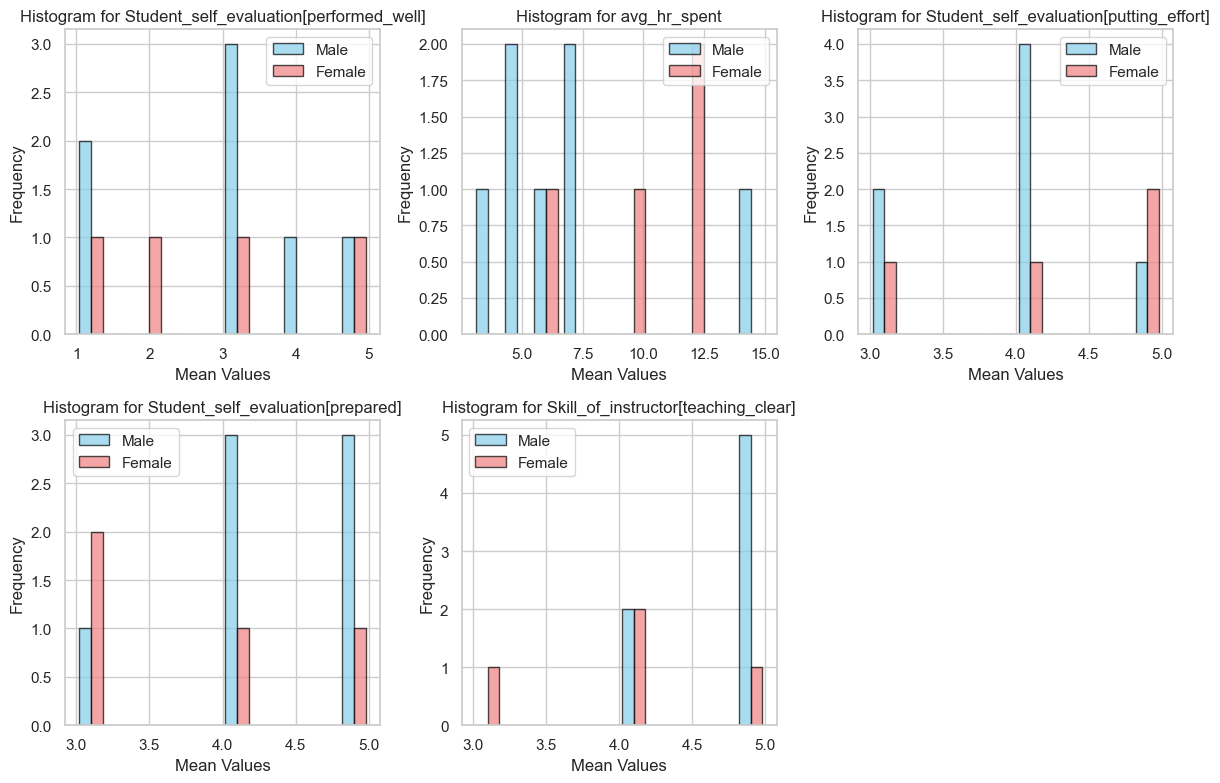

In [117]:
import matplotlib.pyplot as plt

# Group by Gender and calculate the mean for multiple metrics
metrics_by_gender = df.groupby('Gender')[['Student_self_evaluation[performed_well]', 'avg_hr_spent', 'Student_self_evaluation[putting_effort]',
                      'Student_self_evaluation[prepared]', 'Skill_of_instructor[teaching_clear]'
                     ]].mean()

# Plotting histograms for each metric
plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics_by_gender.columns):
    plt.subplot(2, 3, i+1)
    plt.hist([df[df['Gender'] == 'Male'][metric], df[df['Gender'] == 'Female'][metric]], bins=10, color=['skyblue', 'lightcoral'], edgecolor='black', alpha=0.7)
    plt.title(f'Histogram for {metric}')
    plt.xlabel('Mean Values')
    plt.ylabel('Frequency')
    plt.legend(['Male', 'Female'])

# Adjust layout
plt.tight_layout()
plt.show()


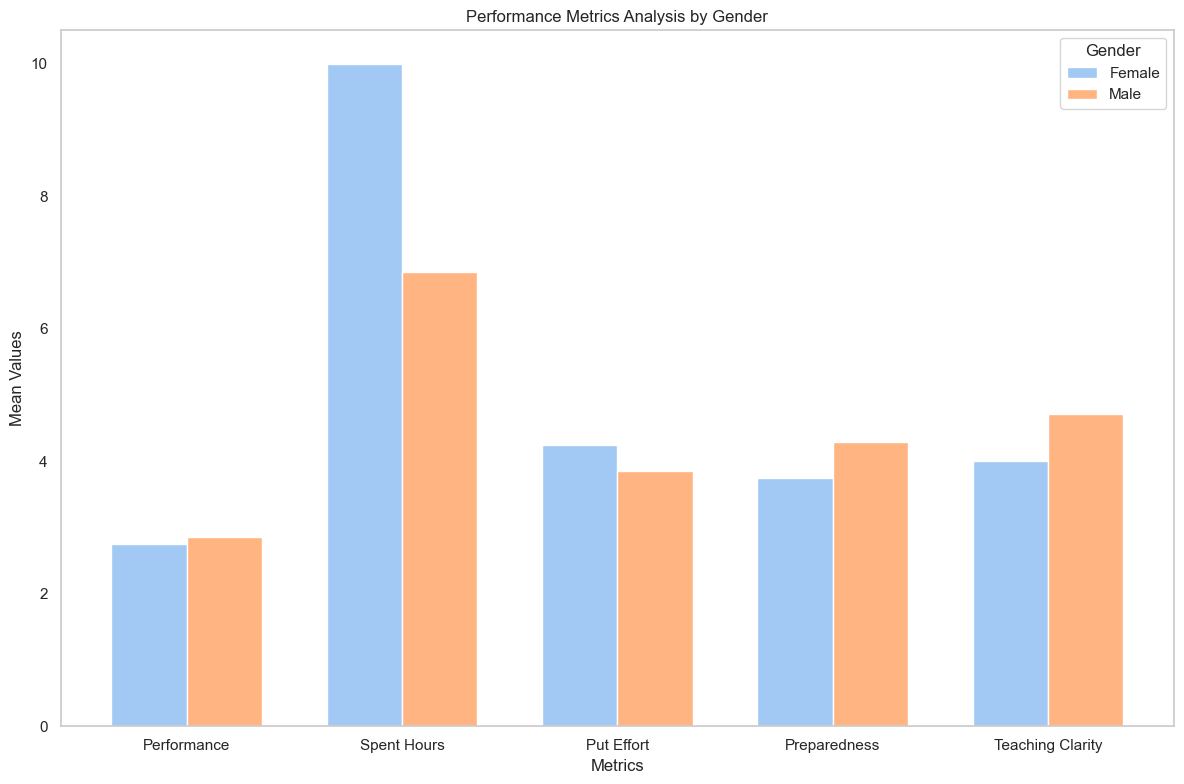

In [118]:
import matplotlib.pyplot as plt

# Group by Gender and calculate the mean for multiple metrics
metrics_by_gender = df.groupby('Gender')[['Student_self_evaluation[performed_well]', 'avg_hr_spent', 'Student_self_evaluation[putting_effort]',
                      'Student_self_evaluation[prepared]', 'Skill_of_instructor[teaching_clear]'
                     ]].mean()

# Custom labels for each metric
custom_labels = ['Performance', 'Spent Hours', 'Put Effort', 'Preparedness', 'Teaching Clarity']

# Plotting grouped bar chart for each metric with custom labels
plt.figure(figsize=(12, 8))
bar_width = 0.35
bar_color= (['#1f77b4', '#ff7f0e'])
index = range(len(metrics_by_gender.columns))

for i, (gender, values) in enumerate(metrics_by_gender.iterrows()):
    plt.bar([p + i * bar_width for p in index], values, bar_width, label=gender)

# Adding labels and a title
plt.xlabel('Metrics')
plt.ylabel('Mean Values')
plt.title('Performance Metrics Analysis by Gender')
plt.xticks([p + bar_width / 2 for p in index], custom_labels)
plt.grid(False)
plt.legend(title='Gender')

# Show the plot
plt.tight_layout()
plt.show()


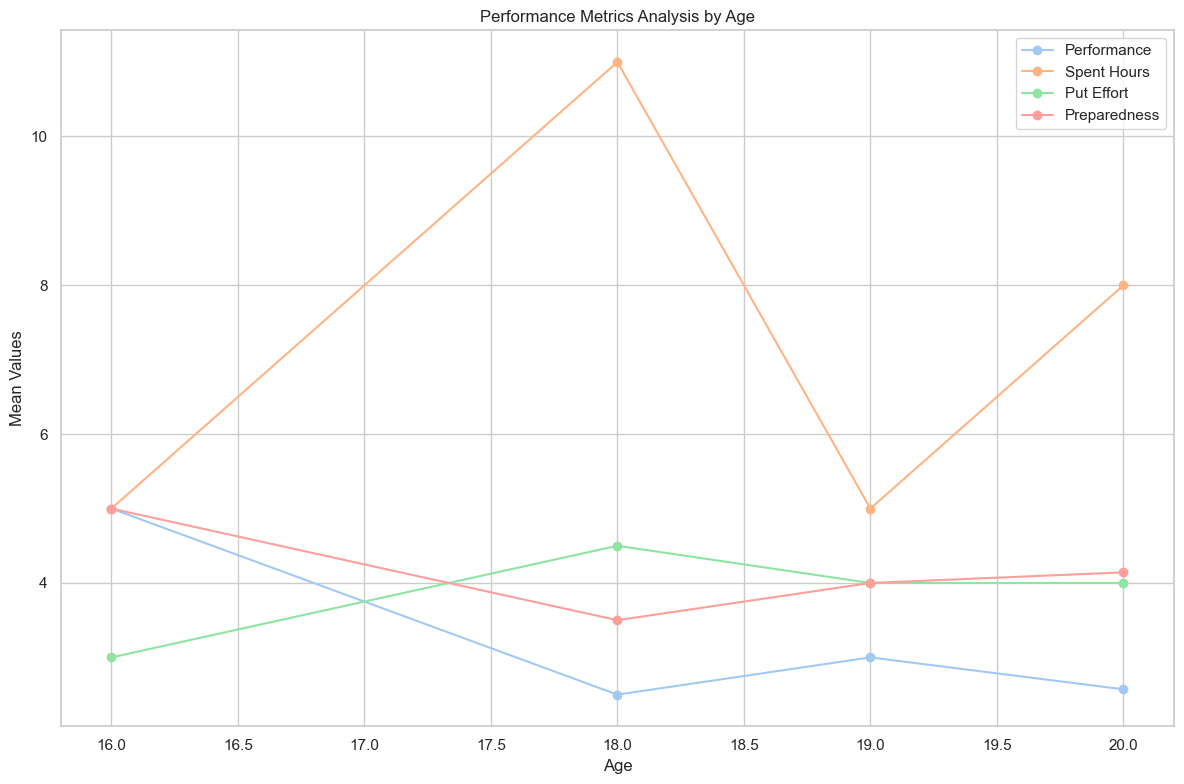

In [119]:


# Group by Age and calculate the mean for multiple metrics
metrics_by_age = df.groupby('Age')[['Student_self_evaluation[performed_well]', 'avg_hr_spent', 'Student_self_evaluation[putting_effort]',
                      'Student_self_evaluation[prepared]'
                     ]].mean()

# Custom labels for each metric
custom_labels = ['Performance', 'Spent Hours', 'Put Effort', 'Preparedness']

# Plotting line chart for each metric with custom labels
plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics_by_age.columns):
    plt.plot(metrics_by_age.index, metrics_by_age[metric], marker='o', label=f'{custom_labels[i]}')

# Adding labels and a title
plt.xlabel('Age')
plt.ylabel('Mean Values')
plt.title('Performance Metrics Analysis by Age')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [120]:
gender_prepared = df.groupby('Gender')[[
    'Student_self_evaluation[prepared]'
                     ]].mean()

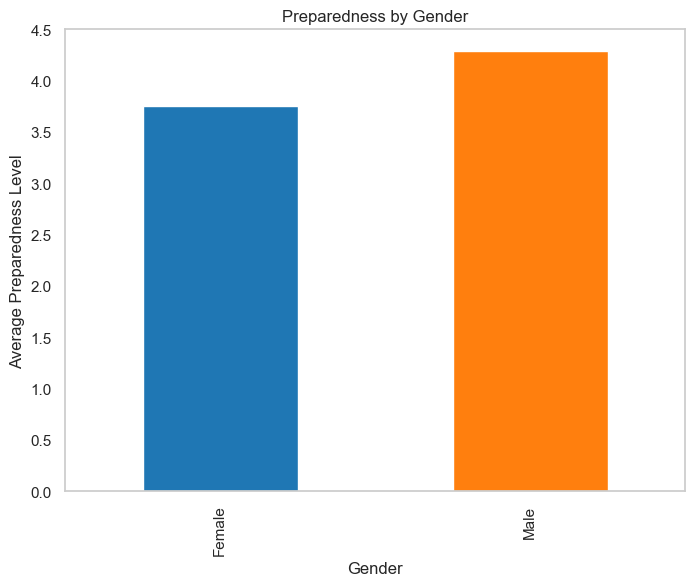

In [121]:
# got

import matplotlib.pyplot as plt

# Group by Gender and select the 'prepared' column
gender_prepared = df.groupby('Gender')['Student_self_evaluation[prepared]'].mean()

# Plotting bar chart
plt.figure(figsize=(8, 6))
gender_prepared.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])

# Adding labels and a title
plt.xlabel('Gender')
plt.ylabel('Average Preparedness Level')
plt.title('Preparedness by Gender')

# Remove background lines and set the background color to white
plt.grid(False)
plt.gca().set_facecolor('white')

# Show the plot
plt.show()


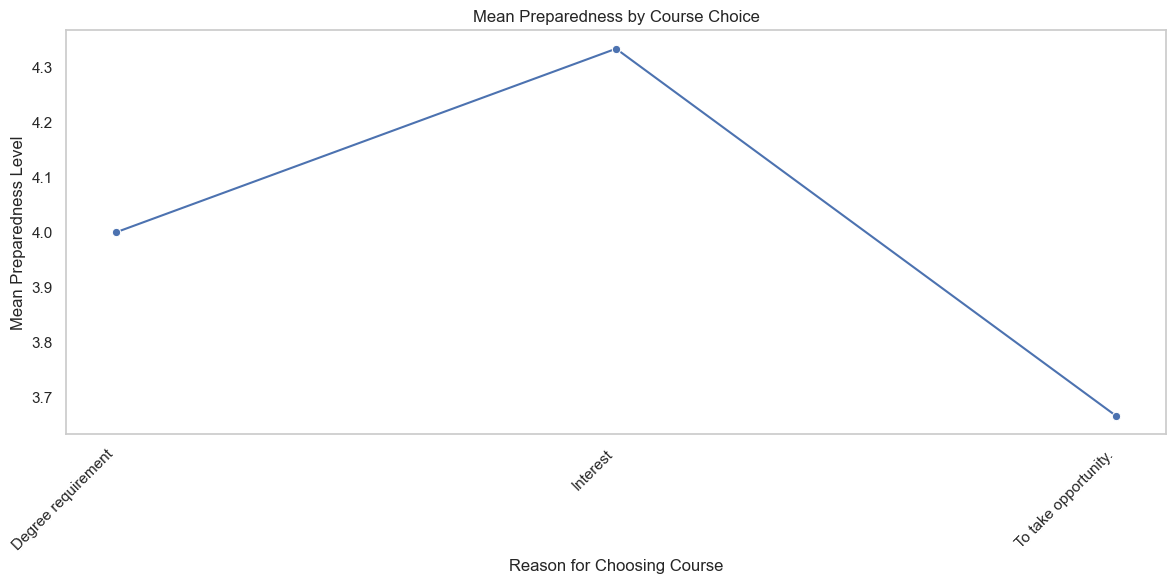

In [122]:

# Group by 'why_chose_course' and calculate the mean of 'Student_self_evaluation[prepared]'
grouped_data = df.groupby('why_chose_course')['Student_self_evaluation[prepared]'].mean().reset_index()

# Set Seaborn style
sns.set(style="whitegrid")

# Plotting line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='why_chose_course', y='Student_self_evaluation[prepared]', data=grouped_data, marker='o')

# Adding labels and a title
plt.xlabel('Reason for Choosing Course')
plt.ylabel('Mean Preparedness Level')
plt.title('Mean Preparedness by Course Choice')

# Show the plot
plt.grid(False)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


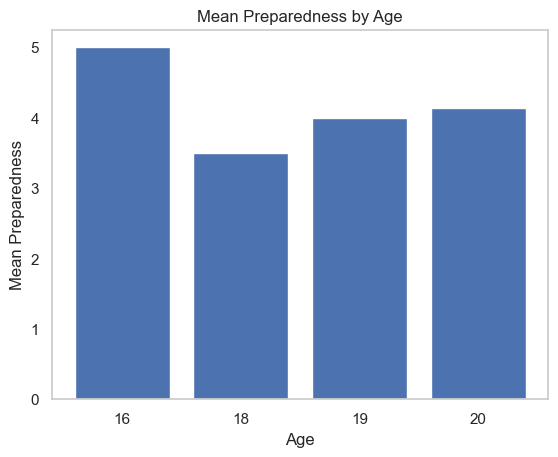

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# If 'Age' is not already a column, you might need to use df['Age'] to access it

# Group by 'Age' and calculate the mean of 'Student_self_evaluation[prepared]'
grouped_data = df.groupby('Age')['Student_self_evaluation[prepared]'].mean()

# Convert the result to a DataFrame (optional, depending on your needs)
result_df = pd.DataFrame({'Age': grouped_data.index, 'Mean_Preparedness': grouped_data.values})

# Convert 'Age' to string to avoid the inclusion of missing values in the x-axis
result_df['Age'] = result_df['Age'].astype(str)

# Plot the bar chart
plt.grid(False)
plt.bar(result_df['Age'], result_df['Mean_Preparedness'])
plt.xlabel('Age')
plt.ylabel('Mean Preparedness')
plt.title('Mean Preparedness by Age')
plt.show()


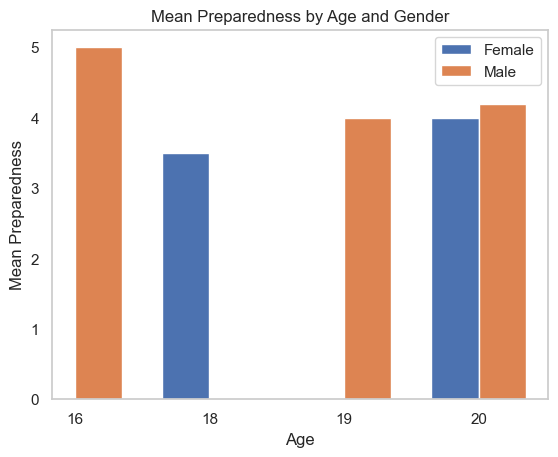

In [124]:
# Group by 'Age' and calculate the mean of 'Student_self_evaluation[prepared]' and mean of 'Gender'
grouped_data = df.groupby(['Age', 'Gender'])[['Student_self_evaluation[prepared]']].mean().unstack()


# Flatten the multi-index columns
grouped_data.columns = grouped_data.columns.get_level_values(1)

# Convert the result to a DataFrame (optional, depending on your needs)
result_df = pd.DataFrame({'Age': grouped_data.index, 'Mean_Preparedness': grouped_data['Female'], 'Mean_Preparedness_Male': grouped_data['Male']})

# Convert 'Age' to string to avoid the inclusion of missing values in the x-axis
result_df['Age'] = result_df['Age'].astype(str)

# Plot the grouped bar chart
bar_width = 0.35
index = np.arange(len(result_df['Age']))

fig, ax = plt.subplots()
bar1 = ax.bar(index - bar_width/2, result_df['Mean_Preparedness'], bar_width, label='Female')
bar2 = ax.bar(index + bar_width/2, result_df['Mean_Preparedness_Male'], bar_width, label='Male')

ax.set_xlabel('Age')
ax.set_ylabel('Mean Preparedness')
ax.set_title('Mean Preparedness by Age and Gender')
ax.set_xticks(index)
ax.set_xticklabels(result_df['Age'])  # Add this line to set the tick labels explicitly
ax.legend()
ax.grid(False)

plt.show()


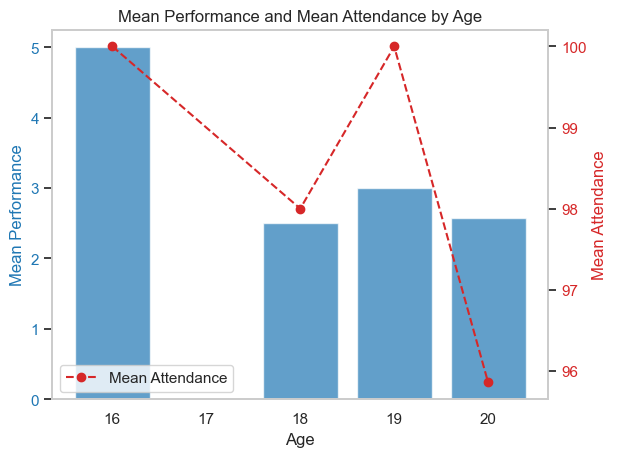

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Group by 'Age' and calculate the mean of 'Student_self_evaluation[performed_well]' and 'Attendance%'
grouped_data = df.groupby('Age')[['Student_self_evaluation[performed_well]', 'Attendance %']].mean()

# Create a bar chart for 'Student_self_evaluation[performed_well]'
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Age')
ax1.set_ylabel('Mean Performance', color=color)
ax1.bar(grouped_data.index, grouped_data['Student_self_evaluation[performed_well]'], color=color, alpha=0.7, label='Mean Performance')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)

# Create a line chart for 'Attendance %'
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Mean Attendance', color=color)
ax2.plot(grouped_data.index, grouped_data['Attendance %'], color=color, marker='o', linestyle='dashed', label='Mean Attendance')
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)

# Place legend after both plots have been created
plt.title('Mean Performance and Mean Attendance by Age')
plt.grid(False)
plt.legend()
plt.show()


In [ ]:
grouped_data = df.groupby('why_chose_course')['Student_self_evaluation[performed_well]'].mean()


result_df = pd.DataFrame({'Reason': grouped_data.index, 'Mean_Performed_Well': grouped_data.values})

# Plot the bar chart
plt.bar(result_df['Reason'], result_df['Mean_Performed_Well'])
plt.xlabel('Reason for Choosing Course')
plt.ylabel('Average Performance')
plt.title('Performance Level by Reason for Choosing Course')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()


In [ ]:
grouped_data = df.groupby('Age')[[
    'Course_Structure[course_challenging]',
    'Student_self_evaluation[challenges]',
    'Student_self_evaluation[prepared]',
    'Skill_of_instructor[teaching_clear]',
    'Skill_of_instructor[instructor_cared_students]'
]].mean()
grouped_data



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame

# Extract the variables of interest
x_values = df['Skill_of_instructor[teaching_clear]']
y_values = df['Course_Structure[course_challenging]']

# Create a 2D histogram
plt.hist2d(x_values, y_values, bins=(20, 20), cmap='Blues', cmin=1)

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Frequency')

# Add labels and title
plt.xlabel('Skill_of_instructor[teaching_clear]')
plt.ylabel('Course_Structure[course_challenging]')
plt.title('2D Histogram for Selected Variables')

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Extract the variables of interest
x_values = df['Skill_of_instructor[teaching_clear]']
y_values = df['Course_Structure[course_challenging]']

# Create a scatter plot
plt.scatter(x_values, y_values, alpha=0.7)

# Add labels and title
plt.xlabel('Skill of instructor [teaching clear]')
plt.ylabel('Course Structure [course is challenging]')
plt.title('Scatter Plot for Selected Variables')

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Extract the variables of interest
x_values = df['Skill_of_instructor[teaching_clear]']
y_values = df['Student_self_evaluation[challenges]']

# Create a scatter plot
plt.scatter(x_values, y_values, alpha=0.7)

# Add labels and title
plt.xlabel('Skill of instructor [teaching clear]')
plt.ylabel('Student self evaluation [challenges]')
plt.title('Scatter Plot for Selected Variables')

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

grouped_data = df.groupby('Age')[[
    'Course_Structure[course_challenging]',
    'Student_self_evaluation[challenges]',
    'Student_self_evaluation[prepared]',
    'Skill_of_instructor[teaching_clear]',
    'Skill_of_instructor[instructor_cared_students]'
]].mean()


# Assuming 'grouped_data' is your DataFrame

# Create a stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 7))

# Set the title and labels
plt.title('Stacked Bar Chart of Grouped Data')
plt.xlabel('Age')
plt.ylabel('Mean Scores')

# Place legend after the plot has been created
plt.legend(loc='upper left')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Group by 'Age' and calculate the mean of selected variables
grouped_data = df.groupby('Age')[[
    'Course_Structure[course_challenging]',
    'Student_self_evaluation[challenges]'
]].mean()

# Create a line chart
grouped_data.plot(kind='line', marker='o', figsize=(10, 6))

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Mean Values')
plt.title('Mean Values by Age for Selected Variables')

# Add legend
plt.legend(['Course_Structure[course_challenging]', 'Student_self_evaluation[challenges]'])
plt.grid(False)
plt.show()


In [ ]:
grouped_data = df.groupby('Gender')[[
    'Course_Structure[course_challenging]',
    'Student_self_evaluation[challenges]'
]].mean()

# Extract data for plotting
means = grouped_data.values.flatten()
gender_labels = grouped_data.index
variable_labels = grouped_data.columns

# Set up positions for the bars along the x-axis
bar_width = 0.4  # Adjust the width of the bars
index = range(len(gender_labels))
bar_positions = [pos + offset * bar_width for pos in index for offset in range(len(variable_labels))]

# Create a bar chart
plt.figure(figsize=(12, 8))  # Adjust the overall figure size
bars = plt.bar(bar_positions, means, color=['skyblue', 'lightcoral'] * len(gender_labels), alpha=0.7, width=bar_width)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Mean Values')
plt.title('Mean Values by Gender for Selected Variables')

# Set the x-axis ticks and labels
tick_positions = [pos + (len(variable_labels) - 1) * bar_width / 2 for pos in index]
plt.xticks(tick_positions, gender_labels)

# Add legend
plt.legend(bars, variable_labels)

plt.grid(False)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Group by 'why_chose_course' and calculate the mean of selected variables
grouped_data = df.groupby('why_chose_course')[[
    'Course_Structure[course_challenging]',
    'Student_self_evaluation[challenges]'
]].mean()

# Create a bar chart
ax = grouped_data.plot(kind='bar', figsize=(10, 8.5), alpha=0.7)

# Add labels and title
plt.xlabel('Reason for Choosing Course')
plt.ylabel('Mean Values')
plt.title('Mean Values by Reason for Choosing Course')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(False)

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Group by 'Gender' and 'Age' and calculate the counts
grouped_data = df.groupby(['Gender', 'Age']).size().unstack()

# Plot a stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Ages by Gender')

# Annotate each bar with its value (as integer)
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    if height > 0:  # Check if height is greater than 0
        ax.annotate(f'{int(height)}', (x + width / 2, y + height / 2), ha='center', va='center')

# Annotate each group with the total value (as integer)
for idx, col in enumerate(grouped_data.columns):
    total = grouped_data[col].sum()
    ax.annotate(f'Total: {int(total)}', (idx, 0), xytext=(0, -20), textcoords='offset points', ha='center', va='center', color='white')

plt.show()


In [ ]:
# Create a pie chart
ax = df['why_chose_course'].value_counts().plot(kind='pie', figsize=(10, 7), autopct='%1.1f%%')

# Set the title and labels
plt.title('Pie Chart of Why Course Was Chosen')
plt.xlabel('Reason')
plt.ylabel('Count')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Create a box plot with mean line
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['avg_hr_spent'])

# Add a line for the mean
plt.axvline(df['avg_hr_spent'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')

# Add labels and title
plt.xlabel('Study Hour')
plt.title('Box Plot with Mean for avg_hr_spent')

# Add legend
plt.legend()

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Create a scatter plot
ax = df.plot.scatter(x='avg_hr_spent', y='Student_self_evaluation[putting_effort]', figsize=(10, 7))

# Set the title and labels
plt.title('Scatter Plot of Mean Scores by Gender')
plt.xlabel('Average Hours Spent')
plt.ylabel('Mean Putting Effort')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Group by 'why_chose_course' and calculate the mean of selected variables
grouped_data = df.groupby('why_chose_course')[[
    'avg_hr_spent', 'Student_self_evaluation[putting_effort]', 
    'Skill_of_instructor[stimu_student_interest]',
    'Skill_of_instructor[teaching_clear]', 
    'Course_Structure[course_developed_intell_critical]', 
    'Course_Structure[increased_my_ds]'
]].mean()

# Shortened names for the variables
short_labels = {
    'avg_hr_spent': 'Avg HR Spent',
    'Student_self_evaluation[putting_effort]': 'Put Effort',
    'Skill_of_instructor[stimu_student_interest]': 'Stimu Interest',
    'Skill_of_instructor[teaching_clear]': 'Teaching Clear',
    'Course_Structure[course_developed_intell_critical]': 'Course Developed',
    'Course_Structure[increased_my_ds]': 'Increased DS'
}

# Map the shortened names to the DataFrame
grouped_data.rename(columns=short_labels, inplace=True)

# Create a line chart
grouped_data.T.plot(kind='line', marker='o', figsize=(12, 8))

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Mean Values')
plt.title('Mean Values by why_chose_course')

plt.legend(title='why_chose_course', bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
# Group by 'Gender' and calculate the mean of selected variables
grouped_gender = df.groupby('Gender')[['avg_hr_spent', 'Student_self_evaluation[putting_effort]']].mean()

# Create a bar chart for 'Gender'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

grouped_gender.plot(kind='bar', ax=axes[0], rot=0)
axes[0].set_title('Mean Values by Gender')
axes[0].set_ylabel('Mean Values')

# Group by 'Age' and calculate the mean of selected variables
grouped_age = df.groupby('Age')[['avg_hr_spent', 'Student_self_evaluation[putting_effort]']].mean()

# Create a bar chart for 'Age'
grouped_age.plot(kind='bar', ax=axes[1], rot=0)
axes[1].set_title('Mean Values by Age')
axes[1].set_ylabel('Mean Values')

plt.tight_layout()
plt.show()


In [ ]:
# Group by 'Gender' and 'Age' and calculate the mean of 'Course_Structure[course_developed_intell_critical]'
grouped_data = df.groupby(['Gender', 'Age'])['Course_Structure[course_developed_intell_critical]'].mean().unstack()

# Transpose the DataFrame to swap 'Gender' and 'Age'
grouped_data_transposed = grouped_data.T

# Create a bar chart
grouped_data_transposed.plot(kind='bar', figsize=(12, 6), width=0.8)

# Add labels and title
plt.xlabel('Age and Gender')
plt.ylabel('Mean Course Development Score')
plt.title('Mean Course Development Score by Age and Gender')
plt.grid(False)

plt.legend(title='Gender', bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into a DataFrame named 'df'
# Example:
# df = pd.read_csv('your_dataset.csv')

# Assuming 'Age' and 'Course_Structure[course_developed_intell_critical]' are the actual column names in your DataFrame
groupdata = df.groupby('Age')['Course_Structure[course_developed_intell_critical]'].mean()

# Plotting the bar chart
groupdata.plot(kind='bar', figsize=(10, 7))

# Set the title and labels
plt.title('Mean Scores by Age')
plt.xlabel('Age')
plt.ylabel('Mean Course Structure [course developed intellectual critical]')
plt.grid(False)
# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into a DataFrame named 'df'
# Example:
# df = pd.read_csv('your_dataset.csv')

# Assuming 'Age' and 'Course_Structure[course_developed_intell_critical]' are the actual column names in your DataFrame
groupdata = df.groupby('Gender')['Course_Structure[course_developed_intell_critical]'].mean()

# Plotting the bar chart
groupdata.plot(kind='bar', figsize=(10, 7))

# Set the title and labels
plt.title('Mean Scores by Age')
plt.xlabel('Gender')
plt.ylabel('Mean Course Structure [course developed intellectual critical]')
plt.grid(False)
# Show the plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into a DataFrame named 'df'
# Example:
# df = pd.read_csv('your_dataset.csv')

# Assuming 'Gender' and 'Course_Structure[course_developed_intell_critical]' are the actual column names in your DataFrame
groupdata = df.groupby('Gender')['Course_Structure[course_developed_intell_critical]'].mean()

# Plotting the pie chart
ax = groupdata.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(10, 7))

# Set the title
plt.title('Mean Scores by Gender')

# Move the legend to the right
ax.legend(loc='right')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Group by 'why_chose_course' and calculate the mean
grouped_data = df.groupby('why_chose_course')['Course_Structure[course_developed_intell_critical]'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 7))
bars = plt.bar(grouped_data.index, grouped_data, color='#1f77b4')

# Set the title and labels
plt.title('Mean Scores by Course Choice Reason')
plt.xlabel('Reason for Choosing Course')
plt.ylabel('Mean Course Structure [course developed intellectual critical]')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(False)

# Add values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

# Show the plot
plt.show()


In [ ]:
# Boxplot for Attendance %

plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(df['Attendance %'], vert=True, patch_artist=True)

# Add a text label for the mean value
mean_value = df['Attendance %'].mean()
plt.text(1.1, mean_value, f'Mean: {mean_value:.2f}', color='red', fontsize=12, verticalalignment='center')

# Set the title and labels
plt.title('Box Plot of Attendance % with Mean Value')
plt.xlabel('Attendance %')

# Show the plot
plt.show()